### Initialize notebook

In [2]:
import math
import os

os.chdir('/home/ak/PycharmProjects/ature/')
import random
from random import shuffle

import numpy as np
from scipy.ndimage.measurements import label
from skimage.morphology import skeletonize

import utils.img_utils as imgutils
from commons.IMAGE import Image
from neuralnet.datagen import Generator
from neuralnet.utils.measurements import get_best_thr
import cv2
from PIL import Image as IMG

sep = os.sep

In [3]:
from neuralnet.unet.runs import DRIVE as DU
from neuralnet.thrnet.runs import DRIVE as DT

In [4]:
image = Image()

In [8]:
file = '11_test'
image.load_file(data_dir=DT['Dirs']['image'], file_name= file +'.png')
image.load_ground_truth(gt_dir=DT['Dirs']['truth'], fget_ground_truth=DT['Funcs']['truth_getter'])
image.working_arr = imgutils.get_image_as_array(DU['Dirs']['image'] + '/' + file + '.tif')[:,:,1]
image.apply_clahe()

In [9]:
patches = np.loadtxt(file + '_patch.csv', delimiter=',')
np.random.shuffle(patches)

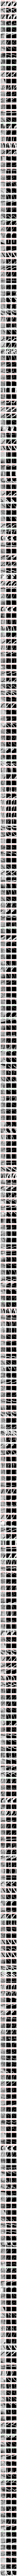

In [10]:
num = 400
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4,700)
f, axarr = plt.subplots(num,3)
for i in range(num):
    y, x, diff, a, b, c, d = patches[i]
    a, b, c, d = int(a), int(b), int(c), int(d)
    cl = 'black'
    if abs(diff) > 20:
        cl = 'red'
    elif abs(diff)  <= 5:
        cl = 'green'
    
    axarr[i, 0].imshow(image.working_arr[a:b,c:d], cmap='gray')
    axarr[i, 0].set_title('dff:' + str(diff), color=cl)
    axarr[i, 0].set_yticklabels([])
    axarr[i, 0].set_xticklabels([])
    
    axarr[i, 1].imshow(image.image_arr[a:b,c:d], cmap='gray')
    axarr[i, 1].set_title('prd:' + str(x), color=cl)
    axarr[i, 1].set_yticklabels([])
    axarr[i, 1].set_xticklabels([])
    
    axarr[i, 2].imshow(image.ground_truth[a:b,c:d], cmap='gray')
    axarr[i, 2].set_title('gt:' + str(y), color=cl)
    axarr[i, 2].set_yticklabels([])
    axarr[i, 2].set_xticklabels([])
plt.savefig(file + 'inspect_patch.png')

In [181]:
os.getcwd()

'/home/ak/PycharmProjects/ature'